Fin's Jupyter Notebook for Project One

In [7]:
%matplotlib notebook

In [8]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from pprint import pprint

In [9]:
#load in CSVs
US_DF = pd.read_csv("Resources/US_youtube_trending_data.csv", encoding="utf-8")
#US_DF.head()
CAN_DF = pd.read_csv("Resources/CA_youtube_trending_data.csv", encoding="utf-8")
#CAN_DF.head()
GB_DF = pd.read_csv("Resources/GB_youtube_trending_data.csv", encoding="utf-8")
#GB_DF.head()
IN_DF = pd.read_csv("Resources/IN_youtube_trending_data.csv", encoding="utf-8")
IN_DF.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [11]:
#load in US category json to verify category dictionary
us_cat_file=open("Resources/US_category_id.json")
us_data = json.load(us_cat_file)
pprint(us_data)


{'etag': 'HIrK3n45Uw2IYz9_U2-gK1OsXvo',
 'items': [{'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '5XGylIs7zkjHh5940dsT5862m1Y',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': 'HCjFMARbBeWjpm6PDfReCOMOZGA',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
           {'etag': 'ra8H7xyAfmE2FewsDabE3TUSq10',
            'id': '15',
            'kind': 'youtube#videoCategory',
 

In [12]:
#Create Category DF
categoryId=[]
categoryName=[]

for i in range (len(us_data["items"])):
    categoryId.append(us_data["items"][i]["id"])
    categoryName.append(us_data["items"][i]["snippet"]["title"])
print(categoryId)
print(categoryName)

youtubeCatsDF = pd.DataFrame({"categoryId":categoryId,"categoryName":categoryName})
youtubeCatsDF["categoryId"]=youtubeCatsDF["categoryId"].astype("int64")
youtubeCatsDF = youtubeCatsDF[["categoryId","categoryName"]]
youtubeCatsDF

['1', '2', '10', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']
['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


,categoryId,categoryName
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [13]:
#merge category DF to country DFs
US_merged_df = US_DF.merge(youtubeCatsDF, how="outer", on="categoryId")
#US_merged_df.head()
CA_merged_df = CAN_DF.merge(youtubeCatsDF, how="outer", on="categoryId")
#CA_merged_df.head()
GB_merged_df = GB_DF.merge(youtubeCatsDF, how="outer", on="categoryId")
#GB_merged_df.head()
IN_merged_df = IN_DF.merge(youtubeCatsDF, how="outer", on="categoryId")
IN_merged_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899.0,224925.0,3979409.0,350210.0,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Entertainment
1,4dRHHupQM-s,Naagin 5 | नागिन 5 | Episode 01 | Recap,2020-08-10T04:30:48Z,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24,2020-08-12T00:00:00Z,Naagin 5|Naagin|Season 5|Hina Khan|Dheeraj Dho...,3816680.0,30086.0,6786.0,3733.0,https://i.ytimg.com/vi/4dRHHupQM-s/default.jpg,False,False,"To save Dev's life, Brinda takes him to a myst...",Entertainment
2,-h9fY8j22yg,Ludo | BakLol Video,2020-08-11T10:32:30Z,UCQfE97UMDGgKCFb7iGM8Btg,BakLol Video,24,2020-08-12T00:00:00Z,funny video|ludo video|funny ludo|ludo players...,837562.0,21510.0,2290.0,1704.0,https://i.ytimg.com/vi/-h9fY8j22yg/default.jpg,False,False,This is a comedy video just to entertain you.F...,Entertainment
3,oaSgSobLwtQ,FLESH Official Trailer | Eros Now Originals | ...,2020-08-11T07:22:53Z,UCX52tYZiEh_mHoFja3Veciw,Eros Now,24,2020-08-12T00:00:00Z,Flesh|flesh web series|flesh new series|flesh ...,13210819.0,18787.0,21210.0,0.0,https://i.ytimg.com/vi/oaSgSobLwtQ/default.jpg,True,False,"Presenting the official trailer of FLESH, a bl...",Entertainment
4,1Y2u-05Yhxw,WALL OF DARES WITH BROTHER & SISTER PART 2 | R...,2020-08-11T08:33:04Z,UCaqULAbiq-6ZRlKmx0Uv_Cw,Rimorav Vlogs,24,2020-08-12T00:00:00Z,rimorav|rimorav vlogs|WALL OF DARES WITH BROTH...,1549015.0,210151.0,2682.0,140543.0,https://i.ytimg.com/vi/1Y2u-05Yhxw/default.jpg,False,False,Watch WALL OF DARES WITH BROTHER & SISTER PART 2,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82831,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sci-Fi/Fantasy
82832,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thriller
82833,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shorts
82834,NaN,NaN,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shows


In [14]:
#create country colun with country code
US_merged_df["Country"]="US"
CA_merged_df["Country"]="CA"
GB_merged_df["Country"]="GB"
IN_merged_df["Country"]="IN"
#preview Country column
#IN_merged_df["Country"].head()

allCountries=[US_merged_df,CA_merged_df,GB_merged_df,IN_merged_df]
allMergedDF=pd.concat(allCountries)
#preview merged country DF
allMergedDF.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName,Country
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908.0,5855.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,US
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036.0,87111.0,1860.0,7052.0,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,US
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11T17:00:31Z,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12T00:00:00Z,smosh|smosh pit|smosh games|funny|comedy,591837.0,44168.0,409.0,2652.0,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs,US
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11T22:00:05Z,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12T00:00:00Z,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955.0,4511.0,69.0,673.0,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,US
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11T23:00:06Z,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12T00:00:00Z,farming|family farm|agriculture|agriculture jo...,277338.0,37533.0,197.0,3666.0,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,US


In [15]:
#count number of occurrences (trending video instances) for each country
allMergedDF["Country"].value_counts()

GB    88412
US    88408
CA    88361
IN    82836
Name: Country, dtype: int64

In [16]:
#isolate needed columns
USChannelsDF = US_merged_df[["channelTitle","view_count","Country"]]
USChannelsDF.head(10)

,channelTitle,view_count,Country
0,Brawadis,1514614.0,US
1,CaseyNeistat,940036.0,US
2,Smosh Pit,591837.0,US
3,Tyler Cameron,105955.0,US
4,Cole The Cornstar,277338.0,US
5,The ACE Family,2630410.0,US
6,Gabrielle Moses,542048.0,US
7,Cleetus2 McFarland,75700.0,US
8,Sammy The Golden Retriever,324426.0,US
9,ValeYas Vlogs,143091.0,US


In [17]:
#USchannelCounts=USChannelsDF["channelTitle"].value_counts()
#USchannelCounts.head()

In [18]:
#calculate total views for each channelTitle in the dataframe
USsums = USChannelsDF.groupby("channelTitle").sum()["view_count"]
USsumsDF = pd.DataFrame(USsums)
USsumsDF.head()

,view_count
channelTitle,
#TeamTrees,3036316.0
$uicideboy$,1224392.0
(G)I-DLE (여자)아이들 (Official YouTube Channel),253406806.0
10 News First,35656132.0
10 Tampa Bay,3128600.0


In [19]:
#sort from most views to least views
US_ChannelSumsDF = USsumsDF.sort_values("view_count", ascending=False)
US_ChannelSumsDF.head()

,view_count
channelTitle,
MrBeast,7.967060e+09
BLACKPINK,5.301820e+09
FFUNTV,5.030654e+09
SMTOWN,3.969759e+09
MrBeast Gaming,3.902489e+09


In [20]:
#divide by 1 million to scale and round
RoundedUSChannelSums = US_ChannelSumsDF["view_count"].div(1000000).round(2)
RoundedUSChannelSumsDF = pd.DataFrame(RoundedUSChannelSums)

#create a copy of the df
Top5USChannels = RoundedUSChannelSumsDF.copy(deep=True)
Top5USChannels = Top5USChannels.head(5)
#add on the country to top 5 channel, rounded DF
Top5USChannels["Country"] = "US"
Top5USChannels.reset_index()

,channelTitle,view_count,Country
0,MrBeast,7967.06,US
1,BLACKPINK,5301.82,US
2,FFUNTV,5030.65,US
3,SMTOWN,3969.76,US
4,MrBeast Gaming,3902.49,US


<IPython.core.display.Javascript object>


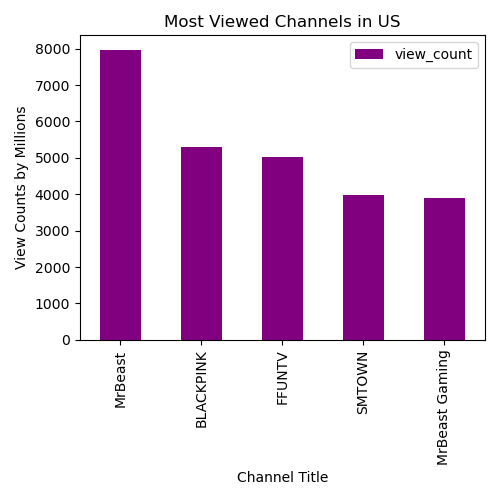

In [21]:
#plot df
Top5USChannels_plot = Top5USChannels.plot(kind="bar", color="purple", figsize=(5,5))

plt.title("Most Viewed Channels in US")
plt.xlabel("Channel Title")
plt.ylabel("View Counts by Millions")

plt.savefig("Most Viewed Channels in US.png")
plt.show()
plt.tight_layout()

In [22]:
#isolate needed columns
CAChannelsDF = CA_merged_df[["channelTitle","view_count","Country"]]
CAChannelsDF.head()

,channelTitle,view_count,Country
0,Diljit Dosanjh,9140911.0,CA
1,XXL,496771.0,CA
2,JYP Entertainment,6000070.0,CA
3,Juice WRLD,2228821.0,CA
4,JYP Entertainment,3433885.0,CA


In [23]:
#calculate total views for each channelTitle in the dataframe
CAsums = CAChannelsDF.groupby("channelTitle").sum()["view_count"]
CAsumsDF = pd.DataFrame(CAsums)
#CAsumsDF.head()

#sort from most views to least views
CA_ChannelSumsDF = CAsumsDF.sort_values("view_count", ascending=False)
#CA_ChannelSumsDF.head()

#divide by 1 million to scale and round
RoundedCAChannelSums = CA_ChannelSumsDF["view_count"].div(1000000).round(2)
RoundedCAChannelSumsDF = pd.DataFrame(RoundedCAChannelSums)

#create a copy of the df
Top5CAChannels = RoundedCAChannelSumsDF.copy(deep=True)
Top5CAChannels = Top5CAChannels.head(5)

#add on the country to top 5 channel, rounded DF
Top5CAChannels["Country"] = "CA"
Top5CAChannels.reset_index()

,channelTitle,view_count,Country
0,MrBeast,7224.63,CA
1,BLACKPINK,5713.21,CA
2,SMTOWN,3921.01,CA
3,Big Hit Labels,3420.52,CA
4,MrBeast Gaming,3354.14,CA


<IPython.core.display.Javascript object>


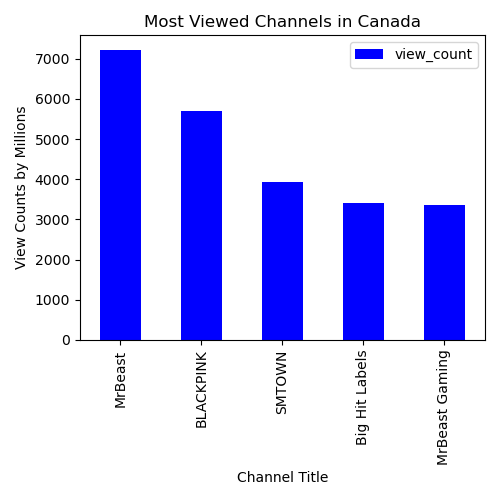

In [24]:
#plot df
Top5CAChannels_plot = Top5CAChannels.plot(kind="bar", color="blue", figsize=(5,5))

plt.title("Most Viewed Channels in Canada")
plt.xlabel("Channel Title")
plt.ylabel("View Counts by Millions")

plt.savefig("Most Viewed Channels in Canada.png")
plt.show()
plt.tight_layout()

In [25]:
#isolate needed columns
GBChannelsDF = GB_merged_df[["channelTitle","view_count"]]
#GBChannelsDF.head()

#calculate total views for each channelTitle in the dataframe
GBsums = GBChannelsDF.groupby("channelTitle").sum()["view_count"]
GBsumsDF = pd.DataFrame(GBsums)
#GBsumsDF.head()

#sort from most views to least views
GB_ChannelSumsDF = GBsumsDF.sort_values("view_count", ascending=False)
#GB_ChannelSumsDF.head()

#divide by 1 million to scale and round
RoundedGBChannelSums = GB_ChannelSumsDF["view_count"].div(1000000).round(2)
RoundedGBChannelSumsDF = pd.DataFrame(RoundedGBChannelSums)

#create a copy of the df
Top5GBChannels = RoundedGBChannelSumsDF.copy(deep=True)
Top5GBChannels = Top5GBChannels.head(5)

#add on the country to top 5 channel, rounded DF
Top5GBChannels["Country"] = "GB"
Top5GBChannels.reset_index()

,channelTitle,view_count,Country
0,MrBeast,6767.30,GB
1,BLACKPINK,4325.77,GB
2,SMTOWN,3677.91,GB
3,JYP Entertainment,3059.46,GB
4,MrBeast Gaming,2772.39,GB


<IPython.core.display.Javascript object>


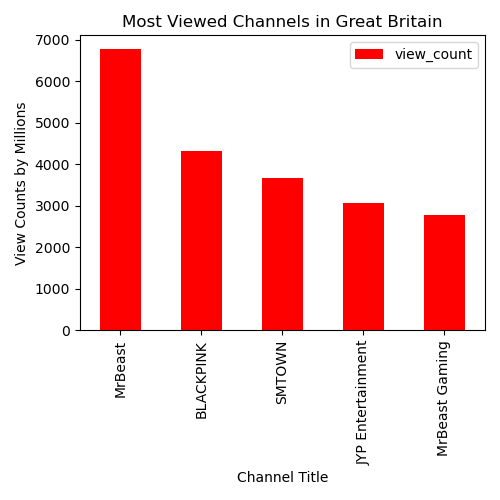

In [26]:
#plot df
Top5GBChannels_plot = Top5GBChannels.plot(kind="bar", color="red", figsize=(5,5))

plt.title("Most Viewed Channels in Great Britain")
plt.xlabel("Channel Title")
plt.ylabel("View Counts by Millions")

plt.savefig("Most Viewed Channels in Great Britain.png")
plt.show()
plt.tight_layout()

In [27]:
#isolate needed columns
INChannelsDF = IN_merged_df[["channelTitle","view_count"]]
#INChannelsDF.head()

#calculate total views for each channelTitle in the dataframe
INsums = INChannelsDF.groupby("channelTitle").sum()["view_count"]
INsumsDF = pd.DataFrame(INsums)
#INsumsDF.head()

#sort from most views to least views
IN_ChannelSumsDF = INsumsDF.sort_values("view_count", ascending=False)
#IN_ChannelSumsDF.head()

#divide by 1 million to scale and round
RoundedINChannelSums = IN_ChannelSumsDF["view_count"].div(1000000).round(2)
RoundedINChannelSumsDF = pd.DataFrame(RoundedINChannelSums)

#create a copy of the df
Top5INChannels = RoundedINChannelSumsDF.copy(deep=True)
Top5INChannels = Top5INChannels.head(5)

#add on the country to top 5 channel, rounded DF
Top5INChannels["Country"] = "IN"
Top5INChannels

,view_count,Country
channelTitle,,
T-Series,11475.88,IN
BLACKPINK,5026.61,IN
Big Hit Labels,4015.53,IN
HYBE LABELS,3250.55,IN
Fortnite Fun TV,3178.98,IN


In [28]:
Top5INChannels.reset_index()

,channelTitle,view_count,Country
0,T-Series,11475.88,IN
1,BLACKPINK,5026.61,IN
2,Big Hit Labels,4015.53,IN
3,HYBE LABELS,3250.55,IN
4,Fortnite Fun TV,3178.98,IN


<IPython.core.display.Javascript object>


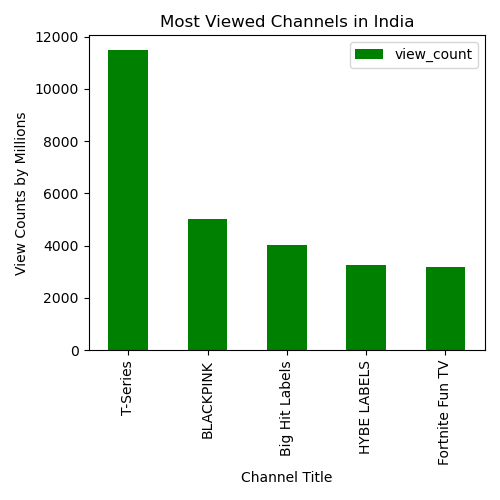

In [29]:
#plot df
Top5INChannels_plot = Top5INChannels.plot(kind="bar", color="green", figsize=(5,5))

plt.title("Most Viewed Channels in India")
plt.xlabel("Channel Title")
plt.ylabel("View Counts by Millions")

plt.savefig("Most Viewed Channels in India.png")
plt.show()
plt.tight_layout()